# 吴恩达深度学习课程作业L1W3一层隐藏层神经网络

## 参考

1. [视频链接](https://mooc.study.163.com/university/deeplearning_ai#/c)
2. [作业链接](https://www.heywhale.com/mw/project/5dd3946900b0b900365f3a48)

## 本节目的

1. 建立一个含一层隐藏层的神经网络，观察其和逻辑回归实现之间的差异
2. 实现单个隐藏层的2分类神经网络
3. 使用具有非线性激活函数的神经元，例如tanh
4. 计算交叉熵损失
5. 实现前向和后向传播

## 1-导入模块

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline
np.random.seed(2030)

### 1.1-planar_utils.py

In [2]:
def func_plot_decision_boundary(model, X, y):
    """
    plot decision boundary
    :param model: 
    :param X:
    :param y:
    :return
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)


def func_sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s


def func_load_planar_dataset():
    """
    load_planar_dataset
    """
    np.random.seed(2030)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y


def func_load_extra_datasets():
    """
    load_extra_datasets
    """
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

### 1.2-testCases.py

In [3]:
def func_layer_sizes_test_case():
    """
    layer sizes test case
    """
    np.random.seed(2030)
    X_assess = np.random.randn(5, 3)
    Y_assess = np.random.randn(2, 3)
    return X_assess, Y_assess


def func_initialize_parameters_test_case():
    """
    initialize_parameters_test_case
    """
    n_x, n_h, n_y = 2, 4, 1
    return n_x, n_h, n_y


def func_forward_propagation_test_case():
    """
    forward_propagation_test_case
    """
    np.random.seed(2030)
    X_assess = np.random.randn(2, 3)

    parameters = {
        'W1': np.array([[-0.00416758, -0.00056267],
                        [-0.02136196,  0.01640271],
                        [-0.01793436, -0.00841747],
                        [ 0.00502881, -0.01245288]]),
        'W2': np.array([[-0.01057952, -0.00909008,  
                         0.00551454,  0.02292208]]),
        'b1': np.array([[ 0.], [ 0.], [ 0.], [ 0.]]),
        'b2': np.array([[ 0.]])}
    
    return X_assess, parameters


def func_compute_cost_test_case():
    """
    compute_cost_test_case
    """
    np.random.seed(2030)
    Y_assess = np.random.randn(1, 3)
    parameters = {
        'W1': np.array([[-0.00416758, -0.00056267],
                        [-0.02136196,  0.01640271],
                        [-0.01793436, -0.00841747],
                        [ 0.00502881, -0.01245288]]),
        'W2': np.array([[-0.01057952, -0.00909008,  
                         0.00551454,  0.02292208]]),
        'b1': np.array([[ 0.], [ 0.], [ 0.], [ 0.]]),
        'b2': np.array([[ 0.]])}

    a2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))
    
    return a2, Y_assess, parameters


def func_backward_propagation_test_case():
    """
    backward_propagation_test_case
    """
    np.random.seed(2030)
    X_assess = np.random.randn(2, 3)
    Y_assess = np.random.randn(1, 3)
    parameters = {
        'W1': np.array([[-0.00416758, -0.00056267],
                        [-0.02136196,  0.01640271],
                        [-0.01793436, -0.00841747],
                        [ 0.00502881, -0.01245288]]),
        'W2': np.array([[-0.01057952, -0.00909008, 
                      0.00551454,  0.02292208]]),
        'b1': np.array([[ 0.], [ 0.], [ 0.], [ 0.]]),
        'b2': np.array([[ 0.]])}

    cache = {
        'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
                        [-0.05225116,  0.02725659, -0.02646251],
                        [-0.02009721,  0.0036869 ,  0.02883756],
                        [ 0.02152675, -0.01385234,  0.02599885]]),
        'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
        'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
                        [-0.05229879,  0.02726335, -0.02646869],
                        [-0.02009991,  0.00368692,  0.02884556],
                        [ 0.02153007, -0.01385322,  0.02600471]]),
        'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}
    return parameters, cache, X_assess, Y_assess


def func_update_parameters_test_case():
    """
    update_parameters_test_case
    """
    parameters = {
        'W1': np.array([[-0.00615039,  0.0169021 ],
                        [-0.02311792,  0.03137121],
                        [-0.0169217 , -0.01752545],
                        [ 0.00935436, -0.05018221]]),
        'W2': np.array([[-0.0104319 , -0.04019007,  
                         0.01607211,  0.04440255]]),
        'b1': np.array([[ -8.97523455e-07],
                        [  8.15562092e-06],
                        [  6.04810633e-07],
                        [ -2.54560700e-06]]),
        'b2': np.array([[  9.14954378e-05]])}

    grads = {
        'dW1': np.array([[ 0.00023322, -0.00205423],
                         [ 0.00082222, -0.00700776],
                         [-0.00031831,  0.0028636 ],
                         [-0.00092857,  0.00809933]]),
        'dW2': np.array([[ -1.75740039e-05, 3.70231337e-03,  
                          -1.25683095e-03, -2.55715317e-03]]),
        'db1': np.array([[  1.05570087e-07],
                         [ -3.81814487e-06],
                         [ -1.90155145e-07],
                         [  5.46467802e-07]]),
        'db2': np.array([[ -1.08923140e-05]])
    }
    return parameters, grads


def func_nn_model_test_case():
    """
    nn_model_test_case
    """
    np.random.seed(2030)
    X_assess = np.random.randn(2, 3)
    Y_assess = np.random.randn(1, 3)
    return X_assess, Y_assess


def func_predict_test_case():
    """
    predict_test_case
    """
    np.random.seed(2030)
    X_assess = np.random.randn(2, 3)
    parameters = {
            'W1': np.array([[-0.00615039,  0.0169021 ],
                            [-0.02311792,  0.03137121],
                            [-0.0169217 , -0.01752545],
                            [ 0.00935436, -0.05018221]]),
            'W2': np.array([[-0.0104319 , -0.04019007,  
                             0.01607211,  0.04440255]]),
            'b1': np.array([[ -8.97523455e-07],
                            [  8.15562092e-06],
                            [  6.04810633e-07],
                            [ -2.54560700e-06]]),
            'b2': np.array([[  9.14954378e-05]])}
    return parameters, X_assess

## 2-导入数据集

1. 将`flower`2分类数据加载到变量X,Y中
2. 使用`matplotlib`可视化数据集
3. 深入了解数据

### 2.1-加载

In [4]:
# load
X, Y = func_load_planar_dataset()
print(X.shape, Y.shape)

(2, 400) (1, 400)


### 2.2-可视化

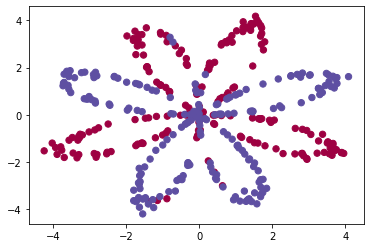

In [5]:
# plot
# X[0, :].shape  (400,)
plt.scatter(X[0, :], X[1, :], c=Y.reshape(X[0, :].shape), s=40, cmap=plt.cm.Spectral)

### 2.3-深入了解

In [6]:
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]

print('the shape of X is: ', shape_X)
print('the shape of Y is: ', shape_Y)
print('m=%d training examples' % m)

the shape of X is:  (2, 400)
the shape of Y is:  (1, 400)
m=400 training examples


## 3-使用简单logistic regression对数据集进行二分类

1. 使用sklearn内置函数执行
2. 画出决策边界

### 3.1-构建

In [7]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.ravel())
# Y.ravel()  # Return a flattened array.

LogisticRegressionCV()

### 3.2-决策边界

Text(0.5, 1.0, 'sklearn logistic regression')

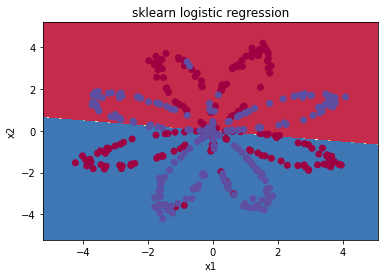

In [8]:
func_plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title('sklearn logistic regression')

In [9]:
pred_lr = clf.predict(X.T)
print('acc: ', float((np.dot(Y, pred_lr)) + np.dot(1-Y, 1-pred_lr)) / float(Y.size)*100)

acc:  49.25


* 正确率只有49.25%， 由于数据集不是线性可分类的，因此逻辑回归效果不佳
* 接下来试试DNN

## 4-DNN结构实现

### 4.1-理论介绍

1. 模型结构

    ![模型结构](./深度学习之吴恩达课程作业2/q17ipqoyrg.png)

2. 数学原理

    输入$x^{(i)}$

    $$
    z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}  \\
    a^{[1] (i)} = \tanh(z^{[1] (i)})  \\
    z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}  \\
    \hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})  \\
    y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}  \\
    loss = J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small 
    $$

3. 建立神经网络的一般方法

    1. 定义神经网络结构，输入参数，隐藏单元参数等
    2. 初始化模型参数
    3. 循环
        1. 实现前向传播
        2. 计算损失
        3. 后向传播以获得梯度
        4. 更新参数（梯度下降）
    4. 预测

### 4.2-定义神经网络结构

* 定义三个变量：
    1. n_x: 输入层的大小
    2. n_h: 隐藏层的大小
    3. n_y: 输出层的大小
* 提示：
    1. 使用shape来找到n_x和n_y
    2. 将隐藏层大小硬编码成4

In [10]:
def func_layer_sizes(X, Y):
    """
    定义每层参数大小
    :param X
    :param Y
    :return (n_x, n_h, n_y)
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [11]:
X_assess, Y_assess = func_layer_sizes_test_case()
(n_x, n_h, n_y) = func_layer_sizes(X_assess, Y_assess)
print(n_x, n_h, n_y)

5 4 2


### 4.3-初始化模型参数

* 练习
    1. 实现函数`func_initialize_parameters()`
* 说明
    1. 确保参数大小正确
    2. 使用随机初始化权重矩阵
        1. 使用`np.random.randn(a, b)*0.01`随机初始化维度为(a,b)的矩阵
    3. 将偏差向量初始化为0
        1. 使用`np.zeros((a,b))`初始化维度为(a,b)的矩阵

In [12]:
def func_initialize_parameters(n_x, n_h, n_y):
    """
    随机初始化模型参数
    :param n_x: size of input layer
    :param n_h: size of hidden layer
    :param n_y: size of output layer
    :return params
    """
    np.random.seed(2030)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    params = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return params

In [13]:
params = func_initialize_parameters(n_x, n_h, n_y)

for key, value in params.items():
    print(key, value)
    print(value.shape)

W1 [[ 0.0140356  -0.01123472  0.00181204  0.00371685  0.00331453]
 [ 0.00616523 -0.00719542  0.00392973 -0.01472587  0.01631223]
 [ 0.00700217 -0.00210701  0.00322235  0.0085826   0.01209621]
 [-0.01813631 -0.01153197  0.00429659 -0.00105094  0.00331243]]
(4, 5)
b1 [[0.]
 [0.]
 [0.]
 [0.]]
(4, 1)
W2 [[ 0.00530549  0.00229905 -0.00579193 -0.00166288]
 [-0.00867708  0.00637114 -0.00827742 -0.00441255]]
(2, 4)
b2 [[0.]
 [0.]]
(2, 1)


### 4.4-循环

* 练习
    1. 实现`func_forward_propagation()`
* 说明
    1. 查看分类器的数学表达式
    2. 可以使用`func_sigmoid()`函数
    3. 可以使用`np.tanh()`函数
    4. 必须执行以下步骤
        1. 使用`params['']`从中检索出每个参数
        2. 实现正向传播，计算$Z^{[1]}, A^{[1]}, Z^{[2]}$和$A^{[2]}$（所有训练数据的预测结果向量）
    5. 向后传播所需的值存储在`cache`中，作为反向传播函数的输入

In [14]:
def func_forward_propagation(X, parameters):
    """
    前向传播
    :param X
    :param parameters
    return A2, cache
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = func_sigmoid(Z2)
    
    assert (A2.shape == (1, X.shape[1]))
    
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    return A2, cache

In [15]:
X_assess, params = func_forward_propagation_test_case()

In [16]:
X_assess.shape

(2, 3)

In [17]:
params

{'W1': array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
 'W2': array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'b2': array([[0.]])}

In [18]:
for key, value in params.items():
    print(key, value)
    print(value.shape)

W1 [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
(4, 2)
W2 [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
(1, 4)
b1 [[0.]
 [0.]
 [0.]
 [0.]]
(4, 1)
b2 [[0.]]
(1, 1)


In [19]:
A2, cache = func_forward_propagation(X_assess, params)

In [20]:
A2.shape

(1, 3)

In [21]:
for key, value in cache.items():
    print(key, value)
    print('shape', value.shape)
    print('mean:', np.mean(value))

Z1 [[-0.00605859  0.00449566 -0.00110208]
 [-0.02388616  0.02943629  0.00624179]
 [-0.0283006   0.01735875 -0.00843933]
 [ 0.00242969 -0.00977727 -0.00676625]]
shape (4, 3)
mean: -0.002030674846044073
A1 [[-0.00605851  0.00449563 -0.00110208]
 [-0.02388161  0.02942779  0.00624171]
 [-0.02829305  0.01735701 -0.00843913]
 [ 0.00242968 -0.00977696 -0.00676615]]
shape (4, 3)
mean: -0.0020304726884621785
Z2 [[ 0.00018085 -0.00044345 -0.00024671]]
shape (1, 3)
mean: -0.00016977098916522824
A2 [[0.50004521 0.49988914 0.49993832]]
shape (1, 3)
mean: 0.4999575572533775


* 练习：
    2. 实现`func_compute_cost()`函数
* 说明：
    1. 计算公式
        $$
        J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small
        $$

In [22]:
def func_compute_cost(A2, Y):
    """
    计算DNN损失函数
    :param A2: the sigmoid output of the second activation, of shape (1, num_samples)
    :param Y: 'true' labels vector of shape (1, num_samples)
    return cost: cost value
    """
    m = Y.shape[1]  # num_samples
    
    log_probs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), 1-Y)
    cost = -1 / m * np.sum(log_probs)
    
    cost = np.squeeze(cost)  # eg. turns [[17]] into 17
    assert(isinstance(cost, float))
    return cost

In [23]:
A2, Y_assess, params = func_compute_cost_test_case()

In [24]:
A2.shape

(1, 3)

In [25]:
Y_assess.shape

(1, 3)

In [26]:
for key, value in params.items():
    print(key, value)
    print('shape', value.shape)

W1 [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
shape (4, 2)
W2 [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
shape (1, 4)
b1 [[0.]
 [0.]
 [0.]
 [0.]]
shape (4, 1)
b2 [[0.]]
shape (1, 1)


In [27]:
print('cost=', func_compute_cost(A2, Y_assess))

cost= 0.6926644838406011


* 练习
    3. 实现函数`func_backward_propagation()`
* 说明
    1. 反向传播通常是DNN中最难（最数学）的部分，详情见下图
        ![反向传播过程](./深度学习之吴恩达课程作业2/q17hcd4yra.png)
    2. 由于激活函数是`tanh`，所以$g^{[1]'}(z) = 1-a^2$


In [28]:
def func_backward_propagation(parameters, cache, X, Y):
    """
    DNN反向传播
    :param parameters: 
    :param cache: Z1, A1, ...
    :param X:
    :param Y:
    :return grads:
    """
    m = X.shape[1]
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        'dW2': dW2,
        'db2': db2,
        'dW1': dW1,
        'db1': db1
    }
    return grads

In [29]:
params, cache, X_assess, Y_assess = func_backward_propagation_test_case()

In [30]:
for key, value in params.items():
    print(key, value)
    print(value.shape)

W1 [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
(4, 2)
W2 [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
(1, 4)
b1 [[0.]
 [0.]
 [0.]
 [0.]]
(4, 1)
b2 [[0.]]
(1, 1)


In [31]:
for key, value in cache.items():
    print(key, value)
    print(value.shape)

A1 [[-0.00616578  0.0020626   0.00349619]
 [-0.05225116  0.02725659 -0.02646251]
 [-0.02009721  0.0036869   0.02883756]
 [ 0.02152675 -0.01385234  0.02599885]]
(4, 3)
A2 [[0.5002307  0.49985831 0.50023963]]
(1, 3)
Z1 [[-0.00616586  0.0020626   0.0034962 ]
 [-0.05229879  0.02726335 -0.02646869]
 [-0.02009991  0.00368692  0.02884556]
 [ 0.02153007 -0.01385322  0.02600471]]
(4, 3)
Z2 [[ 0.00092281 -0.00056678  0.00095853]]
(1, 3)


In [32]:
grads = func_backward_propagation(params, cache, X_assess, Y_assess)

In [33]:
for key, value in grads.items():
    print(key, value)
    print(value.shape)

dW2 [[-0.00013434 -0.03767573  0.01092386  0.02535612]]
(1, 4)
db2 [[1.09982824]]
(1, 1)
dW1 [[-0.00687442 -0.0060129 ]
 [-0.00589216 -0.00516006]
 [ 0.00358158  0.00313207]
 [ 0.01488723  0.01302015]]
(4, 2)
db1 [[-0.0116354 ]
 [-0.00998301]
 [ 0.00606112]
 [ 0.02519569]]
(4, 1)


* 练习
    4. 实现参数更新。使用梯度下降。规则为：$\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$
* 提示
    1. 具有良好的学习速率（收敛）图和较差的学习速率（发散）的图如下
        ![良好](./深度学习之吴恩达课程作业2/q17hh4otzu.gif)
        ![较差](./深度学习之吴恩达课程作业2/q17hharbth.gif)

In [34]:
def func_update_parameters(parameters, grads, lr=0.5):
    """
    用梯度下降法求解参数
    :param parameters:
    :param grads: 
    :return params:
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1
    W2 = W2 - lr * dW2
    b2 = b2 - lr * db2
    
    params = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return params

In [35]:
parameters, grads = func_update_parameters_test_case()

In [36]:
parameters = func_update_parameters(parameters, grads)

In [37]:
for key, value in parameters.items():
    print(key, value)
    print(value.shape)

W1 [[-0.006267    0.01792921]
 [-0.02352903  0.03487509]
 [-0.01676255 -0.01895725]
 [ 0.00981865 -0.05423187]]
(4, 2)
b1 [[-9.50308498e-07]
 [ 1.00646934e-05]
 [ 6.99888206e-07]
 [-2.81884090e-06]]
(4, 1)
W2 [[-0.01042311 -0.04204123  0.01670053  0.04568113]]
(1, 4)
b2 [[9.69415948e-05]]
(1, 1)


### 4.5-集成4.2-4.4

* 练习
    1. 实现`func_nn_model()`
* 说明
    1. DNN必须以正确的顺序组合先前构建的函数

In [38]:
def func_nn_model(X, Y, n_h, lr=0.01, num_epochs=10000, print_cost=False):
    """
    DNN模型结构
    :param X:
    :param Y:
    :param n_h: size of hidden layer
    :param lr: learning rate
    :param num_epochs:
    :param print_cost:
    :return params
    """
    np.random.seed(2030)
    n_x, _, n_y = func_layer_sizes(X, Y)
    
    parameters = func_initialize_parameters(n_x, n_h, n_y)
    
    for i in range(num_epochs):
        A2, cache = func_forward_propagation(X, parameters)
        
        cost = func_compute_cost(A2, Y)
        
        grads = func_backward_propagation(parameters, cache, X, Y)
        
        parameters = func_update_parameters(parameters, grads, lr)
        
        if print_cost and i % 1000 == 0:
            print('cost after iter %i: %f' % (i, cost))
    return parameters

In [39]:
X_assess, Y_assess = func_nn_model_test_case()

In [40]:
parameters = func_nn_model(X_assess, Y_assess, n_h=4, print_cost=True)

cost after iter 0: 0.693205
cost after iter 1000: -13.151851
cost after iter 2000: -39.001577
cost after iter 3000: -65.694278
cost after iter 4000: -92.390449
cost after iter 5000: -119.008931
cost after iter 6000: -145.423522
cost after iter 7000: -171.759454
cost after iter 8000: -198.287019
cost after iter 9000: -224.839316


In [41]:
for key, value in parameters.items():
    print(key, value)
    print(value.shape)

W1 [[ 3.74431586  2.23109456]
 [-3.73327992 -2.23390612]
 [-3.63874744 -2.1951011 ]
 [ 0.98371791  2.08441155]]
(4, 2)
b1 [[ 2.70695608]
 [-2.70082701]
 [-2.68180068]
 [ 3.62615923]]
(4, 1)
W2 [[-69.79192723  69.58197882  68.11071654 -64.95710478]]
(1, 4)
b2 [[-72.96033297]]
(1, 1)


### 4.6-预测

* 练习
    1. 实现`func_predict()`
* 提示
    1. 预测公式为：
        $$
        y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}  
      1 & \text{if}\ activation > 0.5 \\  
      0 & \text{otherwise}  
        \end{cases}
        $$

In [42]:
def func_predict(parameters, X):
    """
    预测
    :param parameters:
    :param X:
    :return preds
    """
    A2, _ = func_forward_propagation(X, parameters)
    preds = np.round(A2)
    return preds

In [43]:
parameters, X_assess = func_predict_test_case()

In [44]:
preds = func_predict(parameters, X_assess)

In [45]:
preds

array([[1., 0., 0.]])

## 5-使用DNN对数据集进行二分类

In [46]:
X.shape

(2, 400)

In [47]:
Y.shape

(1, 400)

In [48]:
parameters = func_nn_model(X, Y, n_h=4, num_epochs=10000, print_cost=True)

cost after iter 0: 0.693208
cost after iter 1000: 0.691372
cost after iter 2000: 0.671402
cost after iter 3000: 0.652211
cost after iter 4000: 0.610984
cost after iter 5000: 0.583739
cost after iter 6000: 0.551672
cost after iter 7000: 0.475934
cost after iter 8000: 0.417390
cost after iter 9000: 0.380454


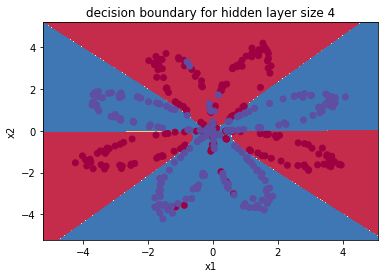

In [49]:
func_plot_decision_boundary(lambda x: func_predict(parameters, x.T), X, Y)
plt.title('decision boundary for hidden layer size %i' % 4)
plt.show()

In [50]:
preds = func_predict(parameters, X)
print('acc: ', (np.dot(Y, preds.T)+np.dot(1-Y, (1-preds).T))/float(Y.size)*100)

acc:  [[90.25]]


* 与简单逻辑回归相比，DNN准确性更高，它学习了flower的叶子图案，与逻辑回归不同，DNN能够学习非线性的决策边界

### 4.7-调整隐藏层的大小

* 观察不同大小隐藏层的模型表现

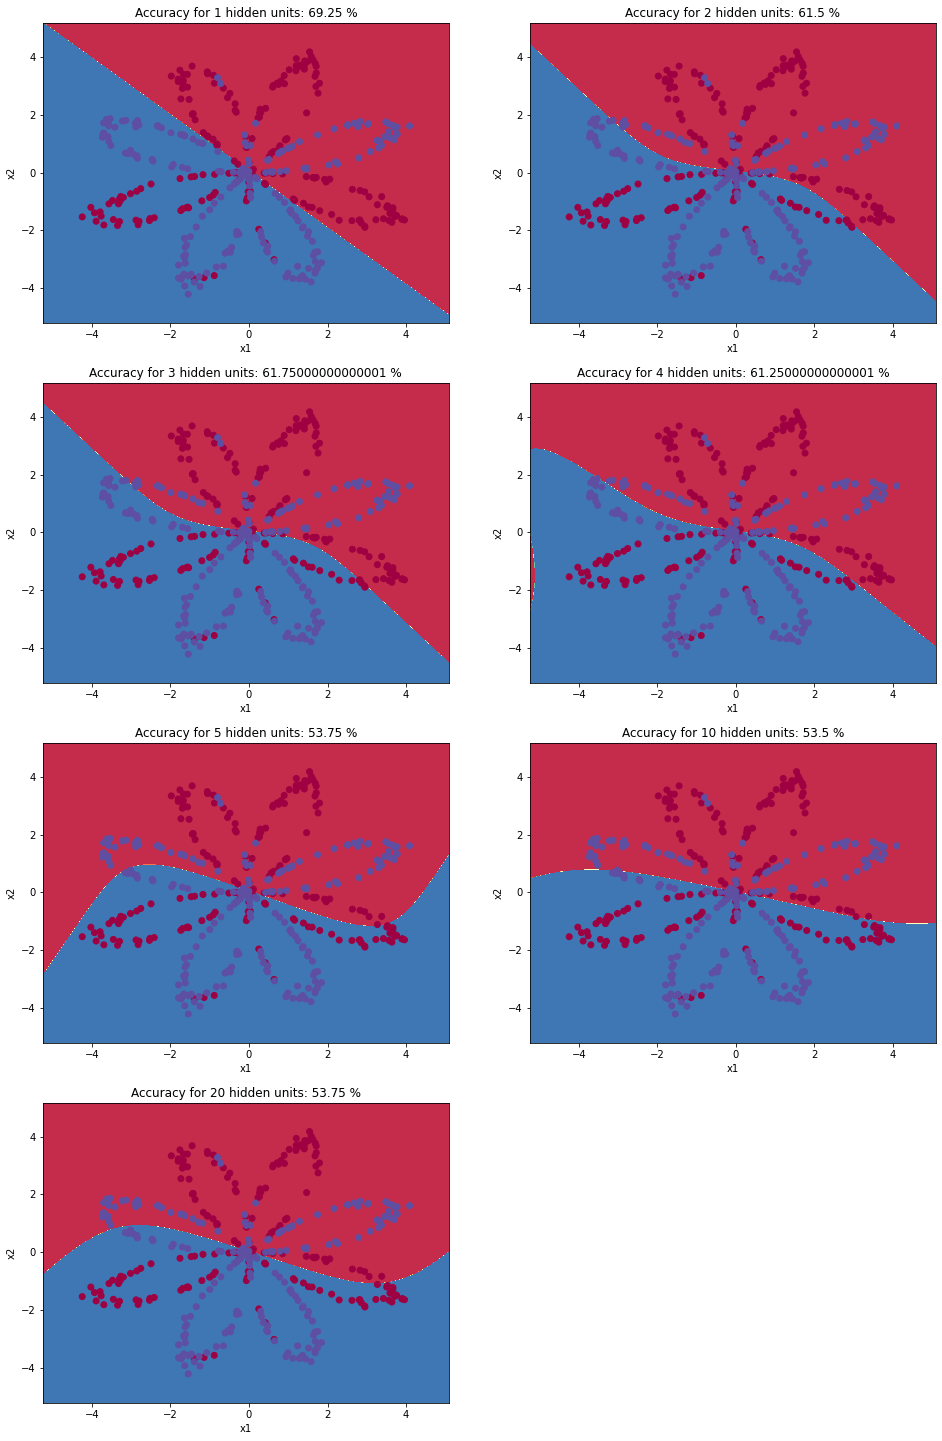

In [51]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1,2,3,4,5,10,20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    parameters = func_nn_model(X, Y, n_h, num_epochs=5000)
    func_plot_decision_boundary(lambda x: func_predict(parameters, x.T), X, Y)
    preds = func_predict(parameters, X)
    acc = float((np.dot(Y,preds.T) + np.dot(1-Y,1-preds.T))/float(Y.size)*100)
#     print ("Accuracy for {} hidden units: {} %".format(n_h, acc))
    plt.title("Accuracy for {} hidden units: {} %".format(n_h, acc))

* 较大的模型能够更好的拟合训练集
* 隐藏层units数量也不是越多越好
* 可以借助正则化，避免模型过拟合
* 正则化方法：
    1. l2正则
    2. dropout
    3. 数据增强
    4. early stopping
    5. 

## 6-模型在其他数据集上的性能

In [52]:
def func_train_predict_extra_dataset():
    """
    在其他数据集上的表现
    :return
    """
    
    nosiy_circles, nosiy_moons, blobs, gaussian_quantiles, no_structure = func_load_extra_datasets()

    datasets = {
        'nosiy_circles': nosiy_circles,
        'nosiy_moons': nosiy_moons,
        'blobs': blobs,
        'gaussian_quantiles': gaussian_quantiles
    }
    plt.figure(figsize=(16, 16))
    for i, dataset in enumerate(datasets.keys()):
        plt.subplot(2, 2, i+1)
        X, Y = datasets[dataset]
        X, Y = X.T, np.expand_dims(Y, axis=0)
        if dataset == 'blobs':
            Y = Y % 2
#         plt.scatter(X[0, :], X[1, :], c=Y.reshape(X[0, :].shape), s=40, cmap=plt.cm.Spectral)
        
        parameters = func_nn_model(X, Y, n_h=4, num_epochs=10000, print_cost=False)
        func_plot_decision_boundary(lambda x: func_predict(parameters, x.T), X, Y)
        plt.title('dataset %s decision boundary for hidden layer size %i' % (dataset, 4))
    plt.show()

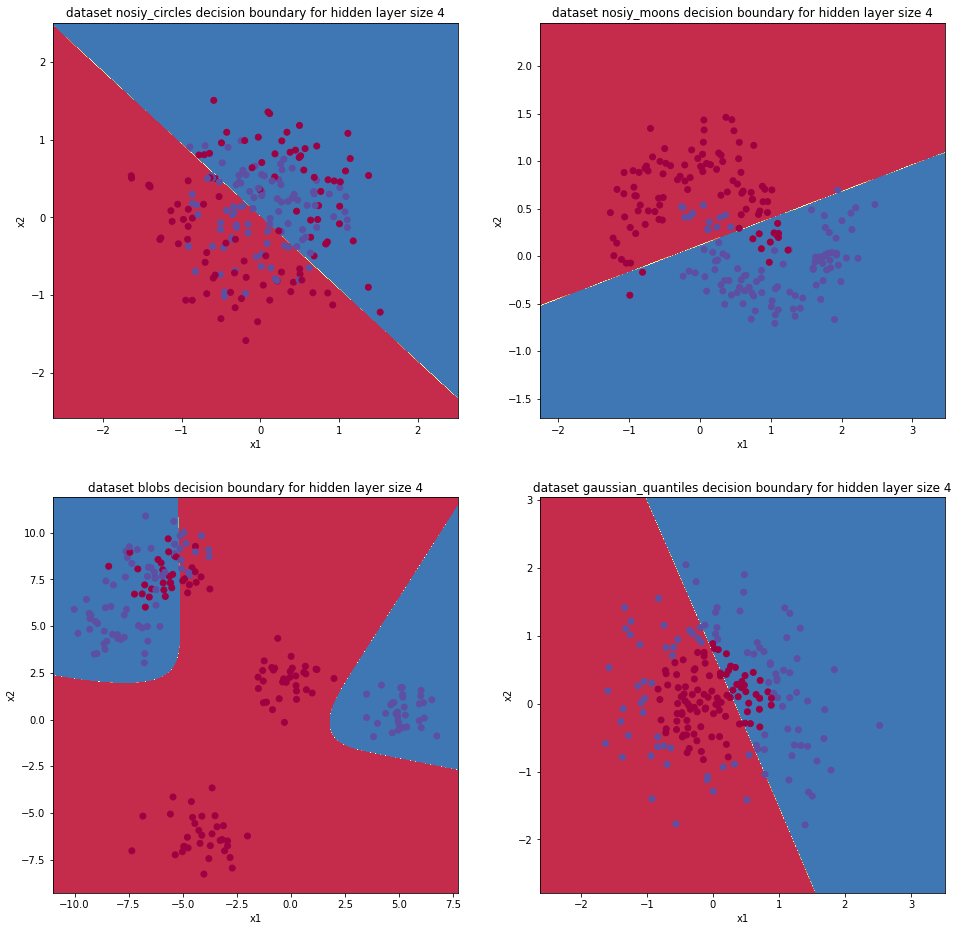

In [53]:
func_train_predict_extra_dataset()